In [27]:
import torch.cuda
!nvidia-smi

Sat May 25 22:47:36 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.76                 Driver Version: 551.76         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080      WDDM  |   00000000:0A:00.0  On |                  N/A |
| 53%   51C    P2            111W /  340W |    1789MiB /  10240MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Install YOLOv8

In [28]:
from ultralytics import YOLO
import ultralytics
import os
from IPython.display import display, Image
from IPython import display
import cv2
display.clear_output()
ultralytics.utils.checks.cuda_device_count()
ultralytics.utils.checks.cuda_is_available()

True

## Train YOLOv8 Model on Custom Dataset

In [29]:
from roboflow import Roboflow
rf = Roboflow(api_key="SmbvOaV5LaeCttD2QED0")
project = rf.workspace("osobjectdetectionproject").project("weapon-xwnwn")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.4, to fix: `pip install ultralytics==8.0.196`


In [ ]:
model = YOLO('yolov8m.pt')
results = model.train(data=f"{dataset.location}/data.yaml", epochs=200, imgsz=640, patience=25, save=True, save_period=25, device="0", dropout=0.5, project=r"weights"),

In [ ]:
metrics = model.val()
metrics.box.maps

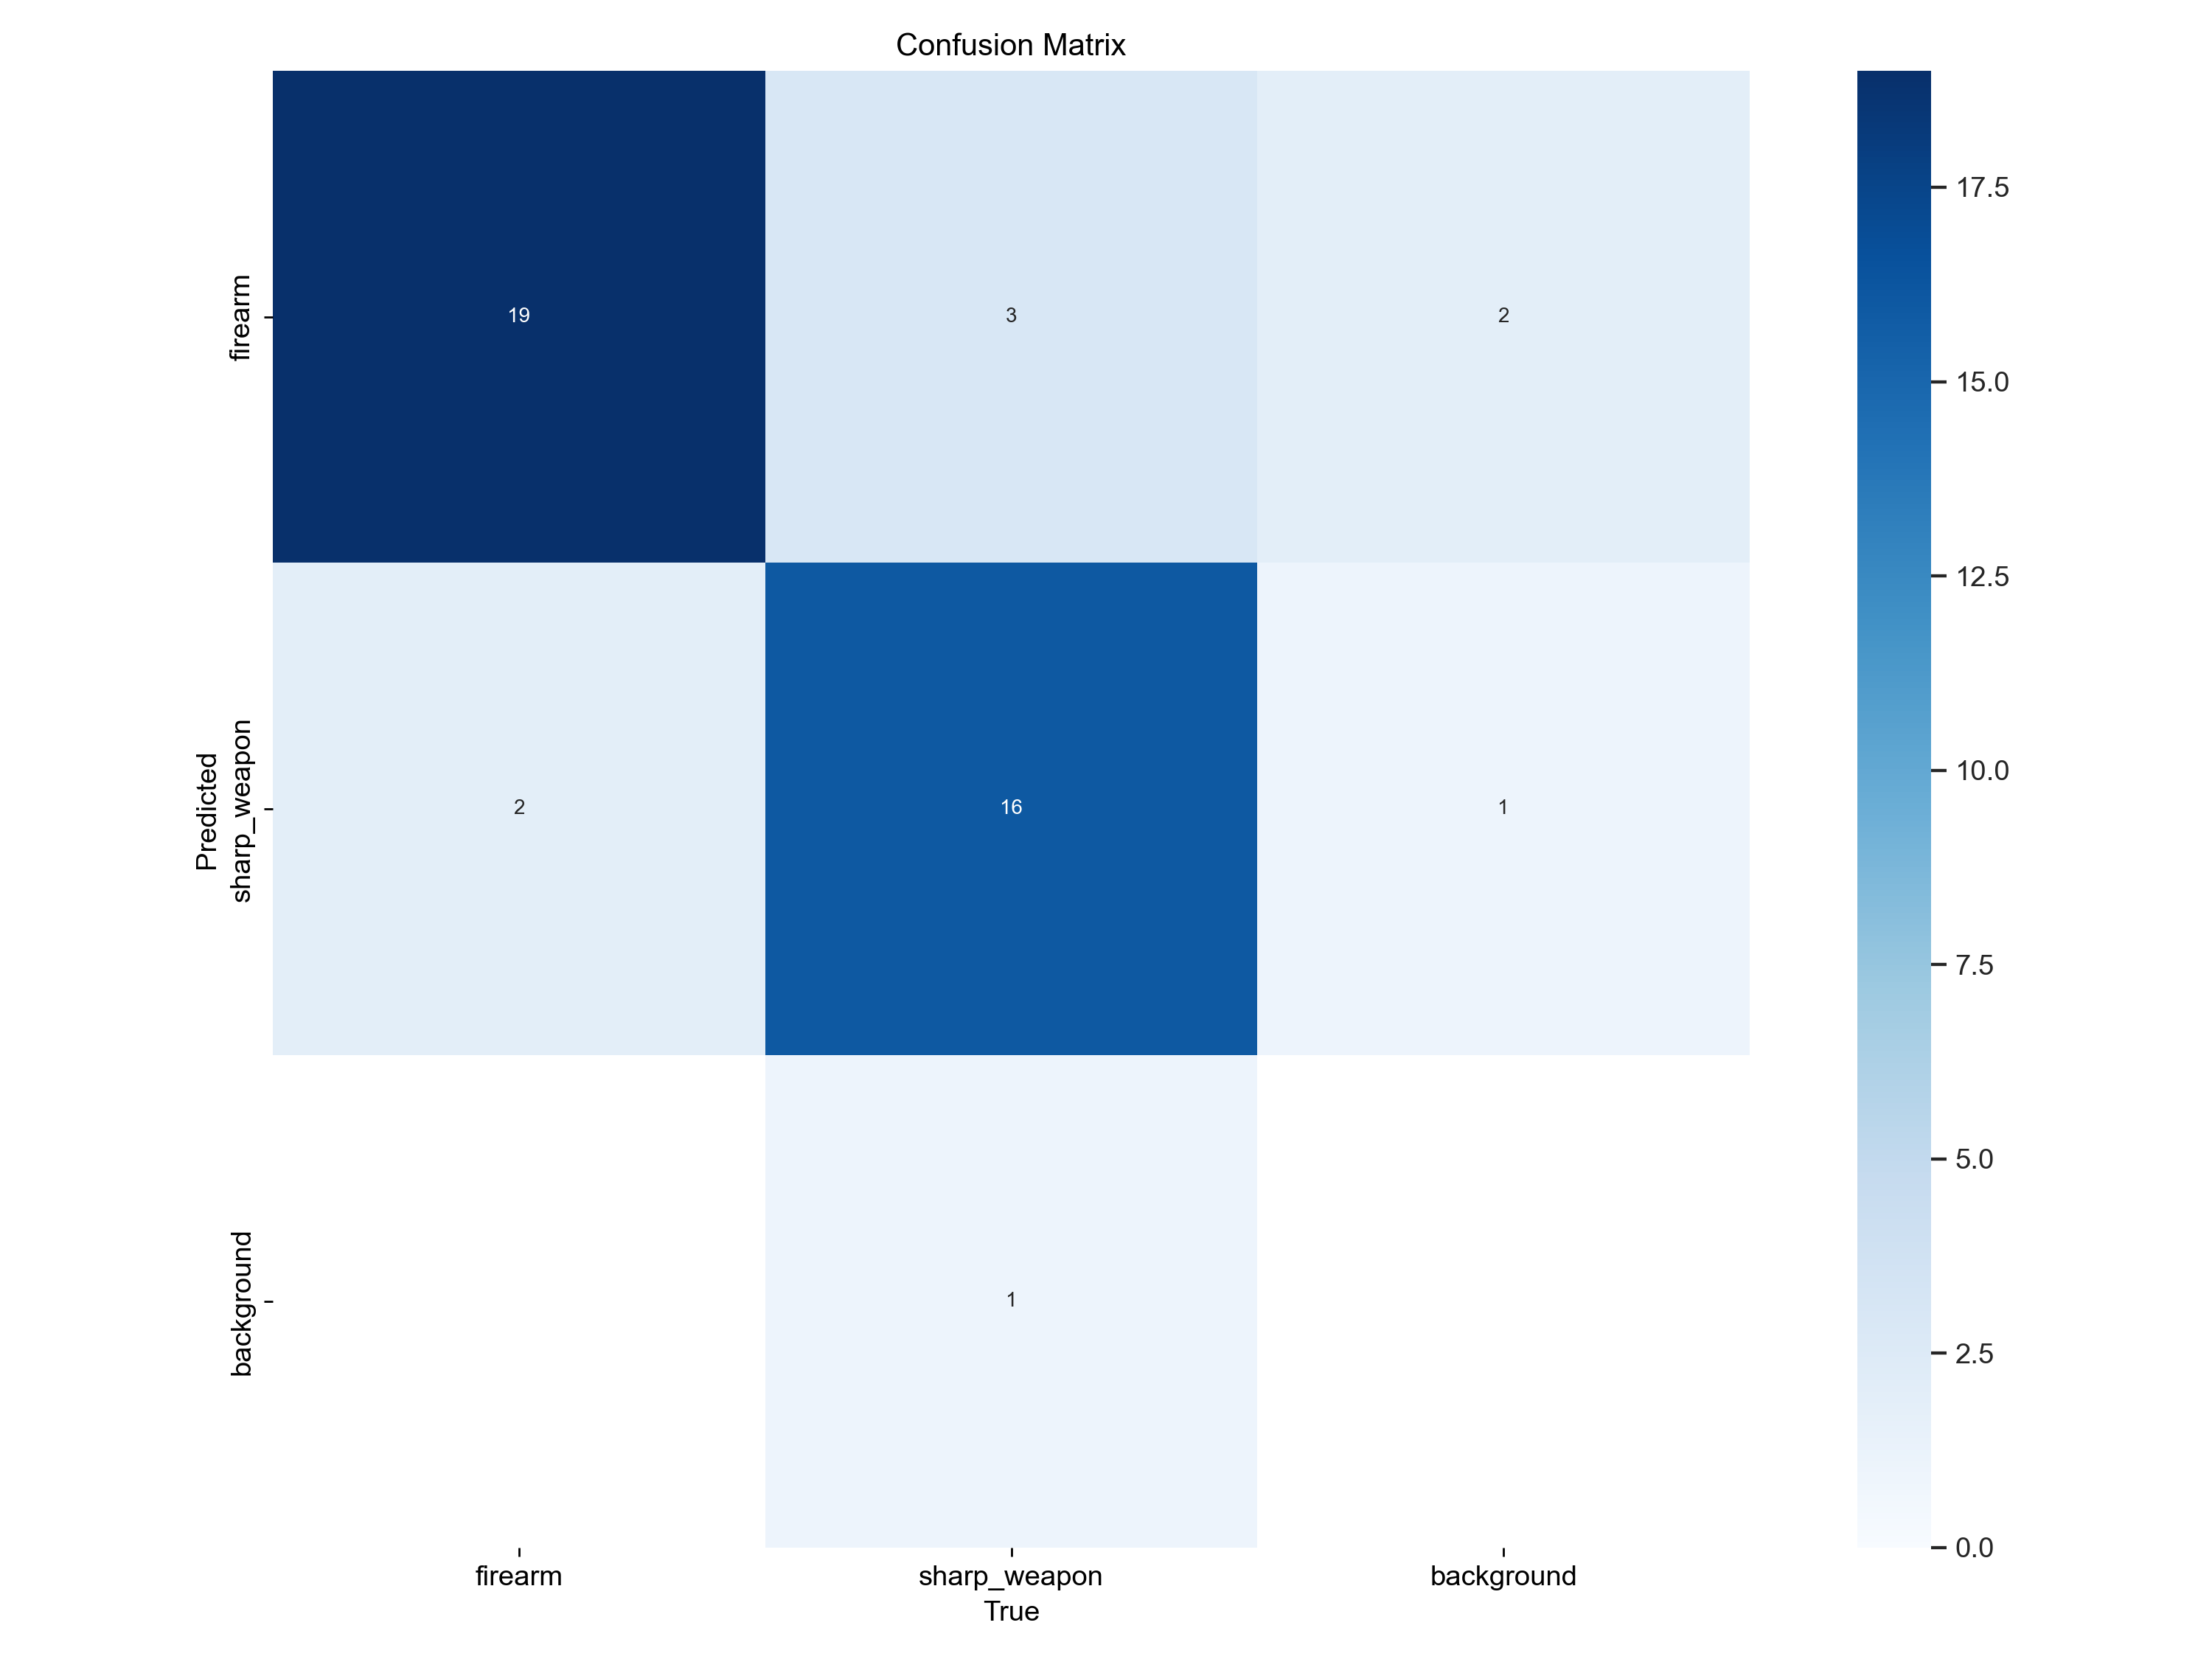

In [30]:
Image(filename=r"weights/train/confusion_matrix.png")

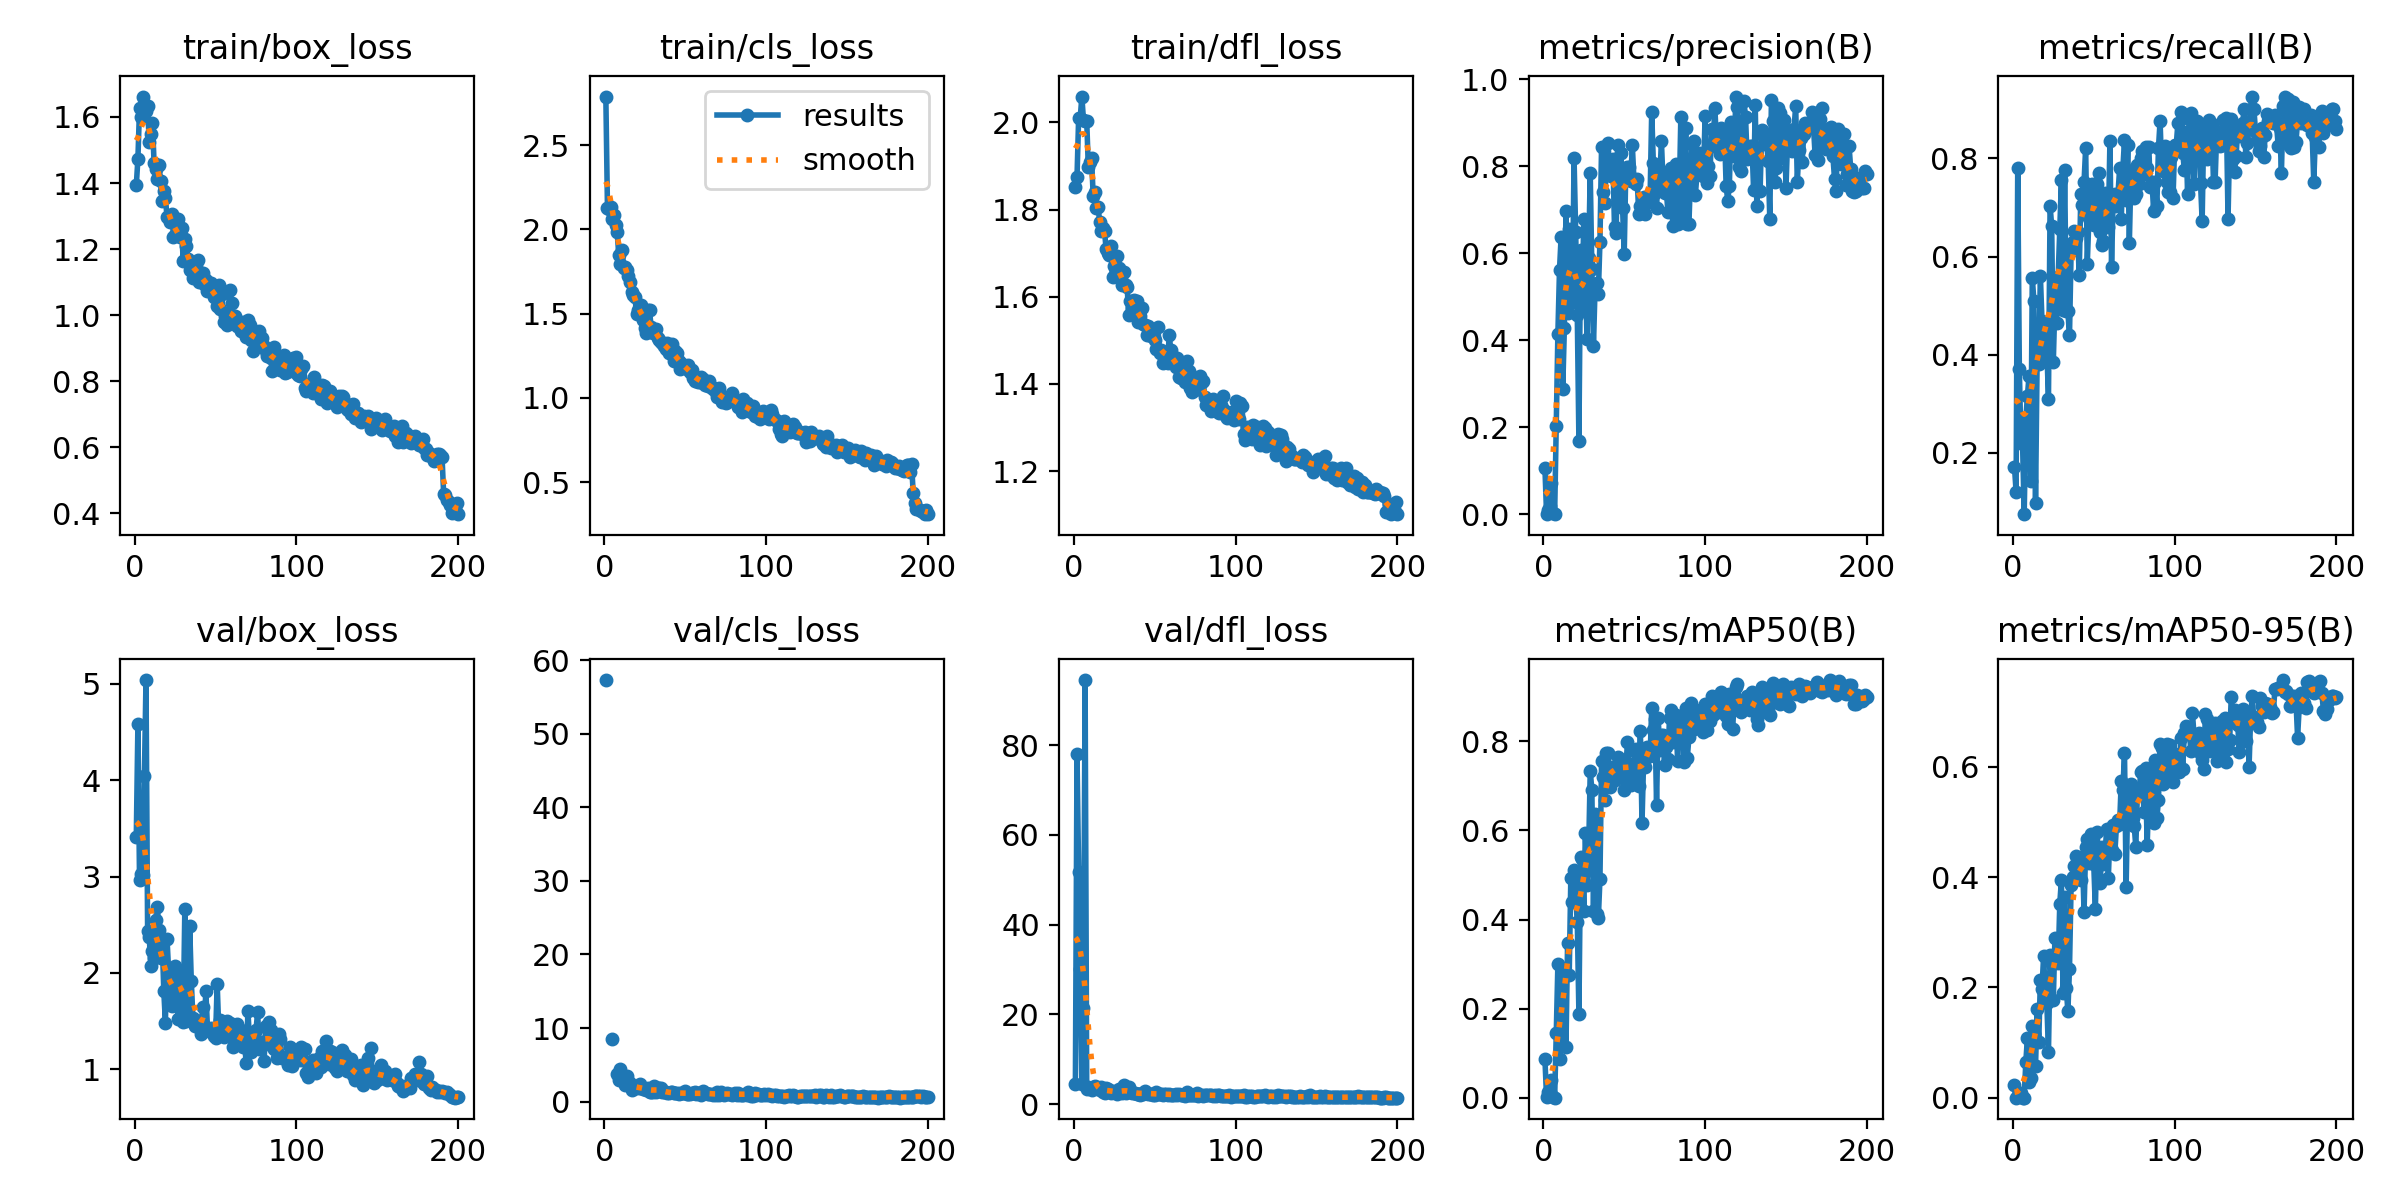

In [31]:
Image(filename=r"weights/train/results.png")

In [32]:
# Load a model
model = YOLO("weights/train/weights/best.pt")

# Run inference
model.predict(r"videos/JW4_scene.mp4", save=True, conf=0.5, half=True, device='0', project="detections")



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/5783) c:\Users\Joshua\Desktop\9S_AI\object_detection\videos\JW4_scene.mp4: 288x640 1 firearm, 28.0ms
video 1/1 (frame 2/5783) c:\Users\Joshua\Desktop\9S_AI\object_detection\videos\JW4_scene.mp4: 288x640 1 firearm, 19.0ms
video 1/1 (frame 3/5783) c:\Users\Joshua\Desktop\9S_AI\object_detection\videos\JW4_scene.mp4: 288x640 1 firearm, 19.0ms
video 1/1 (frame 4/5783) c:\Users\Joshua\Desktop\9S_AI\object_detection\videos\JW4_scene.mp4: 288x

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'firearm', 1: 'sharp_weapon'}
 obb: None
 orig_img: array([[[86, 63,  8],
         [87, 64,  9],
         [88, 65, 10],
         ...,
         [20, 20, 27],
         [19, 20, 25],
         [15, 16, 21]],
 
        [[87, 64,  9],
         [87, 64,  9],
         [88, 65, 10],
         ...,
         [19, 19, 26],
         [17, 18, 23],
         [15, 16, 21]],
 
        [[88, 65, 10],
         [88, 65, 10],
         [89, 66, 11],
         ...,
         [17, 17, 24],
         [17, 18, 23],
         [15, 16, 21]],
 
        ...,
 
        [[33, 17,  7],
         [33, 17,  7],
         [31, 20,  4],
         ...,
         [ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6]],
 
        [[32, 16,  6],
         [33, 17,  7],
         [31, 20,  4],
         ...,
         [ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6]],
 
       